In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('VC_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


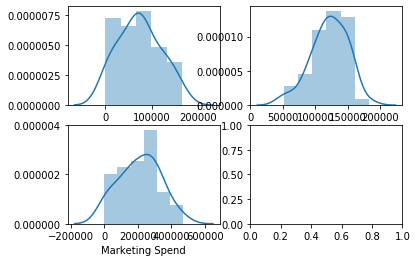

In [4]:
f, ax = plt.subplots(2,2)
sns.distplot(df.iloc[:,0],ax = ax[0][0])
sns.distplot(df.iloc[:,1],ax = ax[0][1])
sns.distplot(df.iloc[:,2],ax = ax[1][0])

In [5]:
# It is regression based problem
# first we will neglect the object feature check the accuracy

In [6]:
X = df.iloc[:,:3] # independent features
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [7]:
y = df.iloc[:,-1] # dependent feature or target
y = y.values.reshape(-1,1)

In [9]:
from sklearn.linear_model import LinearRegression
def reg_model(X_train,X_test,y_train,y_test):
    lr = LinearRegression()
    # fit the model 
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
#     def mae(y_test,pred):
#         return mean_absolute_error(y,pred)
    return errors(y_test,pred)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def errors(y_test,pred):
    return f'mean absolute error => {mean_absolute_error(y_test,pred)} \nmean squared error => {mean_squared_error(y_test,pred)}'

In [11]:
print(reg_model(X,X,y,y))

mean absolute error => 6471.450396104808 
mean squared error => 78417126.01913083


In [12]:
# now splitting the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [13]:
print(reg_model(X_train,X_test,y_train,y_test))

mean absolute error => 6489.660170486644 
mean squared error => 62240269.842915215


In [14]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


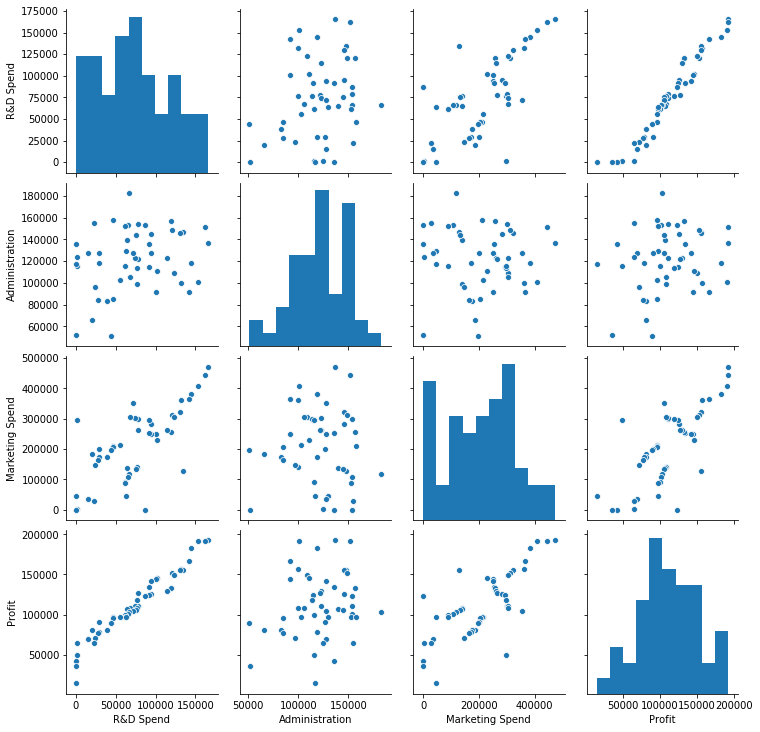

In [15]:
sns.pairplot(df)

In [16]:
# from above graph plot we see that Administration is not related 
# removing it
X.drop(['Administration'],axis =1 , inplace = True)

In [17]:
X.head()

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [19]:
print(reg_model(X_train,X_test,y_train,y_test))
# we see that errors are reduced 

mean absolute error => 6149.762924787707 
mean squared error => 54893128.25019064


In [20]:
# standard scalar 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
y_train = ss.fit_transform(y_train)
y_test = ss.transform(y_test)

In [21]:
print(f'with standard scaler \n{reg_model(X_train,X_test,y_train,y_test)}')

with standard scaler 
mean absolute error => 0.14297530923233084 
mean squared error => 0.029670394603920028


In [22]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)
X_test = min_max.transform(X_test)
y_train = min_max.fit_transform(y_train) # y_train.values.reshape(-1,1)
y_test = min_max.transform(y_test) # y_test.values.reshape(-1,1)

In [23]:
print(f'with min max scaler \n{reg_model(X_train,X_test,y_train,y_test)}')

with min max scaler 
mean absolute error => 0.03463085951975515 
mean squared error => 0.0017407154120727944


In [24]:
# what should we use standard scalar or minmax scaler??


# now considering the object feature

In [25]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


we know from above analysis that 'Administration' feature is not that much important --> remove it 

for 'State' feature --> dummy variable

In [26]:
X = df.iloc[:,[0,2,3]]

In [27]:
X.head()

,R&D Spend,Marketing Spend,State
0,165349.20,471784.10,New York
1,162597.70,443898.53,California
2,153441.51,407934.54,Florida
3,144372.41,383199.62,New York
4,142107.34,366168.42,Florida


Since our model does not take the textual data, So we must have to convert it to numerical data

As our 'State' column is categorical so we have to do 'one hot encoding' for it or 'pd.get_dummies'

In [28]:
states = pd.get_dummies(X['State'],drop_first = True)

now first removing the 'State' feature from X and concating this 'states' dataframe

In [29]:
X.drop(['State'],axis = 1, inplace = True)

C:\Users\Shubham\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [30]:
X = pd.concat([X,states],axis = 1)

In [31]:
X.head()

,R&D Spend,Marketing Spend,Florida,New York
0,165349.20,471784.10,0,1
1,162597.70,443898.53,0,0
2,153441.51,407934.54,1,0
3,144372.41,383199.62,0,1
4,142107.34,366168.42,1,0


In [32]:
y = df.iloc[:,-1]
y = y.values.reshape(-1,1)

In [33]:
# without partitioning the data
print(reg_model(X,X,y,y))

mean absolute error => 6499.4720396598805 
mean squared error => 78883116.0156239


In [34]:
# spliting the data --> train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [35]:
print(reg_model(X_train,X_test,y_train,y_test))

mean absolute error => 6204.253290283771 
mean squared error => 54885162.90078689


In [36]:
# now scaling our data --> Standard Scaler or minmax Scaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
y_train = ss.fit_transform(y_train)
y_test = ss.transform(y_test)

In [37]:
print(reg_model(X_train,X_test,y_train,y_test))

mean absolute error => 0.14424215105246366 
mean squared error => 0.029666089236976882


In [38]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
y_train = mm.fit_transform(y_train)
y_test = mm.transform(y_test)
                          

In [39]:
print(reg_model(X_train,X_test,y_train,y_test))

mean absolute error => 0.0349377084529194 
mean squared error => 0.0017404628229619095


In [40]:
# Lets have a look on different models for regression problems
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
# fitting the model
dtr.fit(X_train,y_train)
pred = dtr.predict(X_test)

In [41]:
print(errors(y_test,pred))

mean absolute error => 0.032019065013714286 
mean squared error => 0.001700793561161296


In [42]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)

C:\Users\Shubham\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Shubham\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
print(errors(y_test,pred))

mean absolute error => 0.03729504165145529 
mean squared error => 0.0017881300259449408


In [44]:
# From above results it is clear that MAE AND RMSE are less --> RandomForestRegressor